## Лабораторная работа № 8 Классификация текстов
* Выполнил: Русин Ярослав, гр. № 6135

## Данная работа представляет собой текстовый набор спам сообщений 2017 года.
### Более подробную информацию можно увидеть по адресу:
* http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/
### Ссылка на ресурс:
* https://www.kaggle.com/team-ai/spam-text-message-classification/data#SPAM%20text%20message%2020170820%20-%20Data.csv

# 1. Найти и загрузить любой датасет для классификации текстов (бинарная или многоклассовая). 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
spam = pd.read_csv('/content/drive/MyDrive/Datasets/SPAM_2017.csv')

In [ ]:
spam.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam.Category.unique()

array(['ham', 'spam'], dtype=object)

2 Выводите в цикле целиком текст первых нескольких записей (этот этап естественно также должен быть отражён в блокноте), смотрите на тексты глазами, много думаете.

In [ ]:
for i in range(100):
    print(spam['Message'][i])
    print('>________________________________<')

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
>________________________________<
Ok lar... Joking wif u oni...
>________________________________<
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
>________________________________<
U dun say so early hor... U c already then say...
>________________________________<
Nah I don't think he goes to usf, he lives around here though
>________________________________<
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
>________________________________<
Even my brother is not like to speak with me. They treat me like aids patent.
>________________________________<
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers.

3 Находите малоинформативные повторяющиеся участки в текстах: это могут быть, например, стандартные «шапки» или стандартные «подвалы» (стандартные приветствия или подписи), или, например, все цифры (если в данном контексте они малоинформативны) или все MD5-хеши, или web-адреса и т.п. — всё что по вашей оценке не несёт информационной нагрузки и пользы для классификации — всё это удаляем (с помощью регекспов или как-то ещё через функции работы со строками). Чтобы не зашумлять тексты малоинфомативными мусорными n-граммами.

In [ ]:
import string
import re
string.punctuation
translator = str.maketrans('', '', string.punctuation)
translator_figures = str.maketrans('','',string.digits)

In [ ]:
for i in range(len(spam)):
    spam['Message'][i] = re.sub(r'www\S+', '', spam['Message'][i])
    spam['Message'][i] = re.sub(r'http\S+','', spam['Message'][i])
    spam['Message'][i] = spam['Message'][i].translate(translator).translate(translator_figures).lower()

In [ ]:
for i in range(20):
    print(spam['Message'][i])
    print('>___________________<')

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
>___________________<
ok lar joking wif u oni
>___________________<
free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs
>___________________<
u dun say so early hor u c already then say
>___________________<
nah i dont think he goes to usf he lives around here though
>___________________<
freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send £ to rcv
>___________________<
even my brother is not like to speak with me they treat me like aids patent
>___________________<
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune
>___________________<
winner as a valued network customer you have been selected to receivea £ prize reward to claim call  c

4 Опциональный шаг: Проходимся по текстам стеммером (пример стемминга есть в tfidf-example.ipynb: если PyStemmer стеммер не заработает, найдите другие на просторах интернета и поделитесь в общем чате вашими рабочими вариантами) — приводим все слова к нормальной форме. Все результаты должны быть в двух вариантах: без стеммера и со стеммером.
Можно использовать не стеммер, а лемматизатор (например, pymorph2)

Использую лемматизатор т.к. стеммер просто режет концовки слов.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
import nltk
from nltk.stem import WordNetLemmatizer 
# Инициализируем Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#принимает на вход строку, разбивает ее на слова, 
#лемматизирует их и склеивает обратно
def lemm(sentence): 
    word_list = nltk.word_tokenize(sentence)
    return ' '.join([lemmatizer.lemmatize(w) for w in word_list])

In [ ]:
spam_lemm = pd.read_csv('/content/drive/MyDrive/Datasets/SPAM_2017.csv') #создадим лемматизированный датафрейм
for i in range(len(spam)):
   spam_lemm['Message'][i] = (lemm(spam['Message'][i]))

In [ ]:
for i in range(10):
    print(spam['Message'][i])
    print('|||||||||||||||')
    print(spam_lemm['Message'][i])
    print()

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
|||||||||||||||
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat

ok lar joking wif u oni
|||||||||||||||
ok lar joking wif u oni

free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs
|||||||||||||||
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply over

u dun say so early hor u c already then say
|||||||||||||||
u dun say so early hor u c already then say

nah i dont think he goes to usf he lives around here though
|||||||||||||||
nah i dont think he go to usf he life around here though

freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send £ to rcv
|||||||||||||||
freemsg hey there darling it been week now and no word bac

5 Создаём матрицу TfIdf с помощью TfidfVectorizer (пример есть в моём блокноте), не забудьте про стоп-слова (stop_words), наряду со словами из библиотеки stop_words можете добавить свои стоп-слова, если по текстам видите, что они мусорные и незначимые

In [ ]:
from sklearn.model_selection import train_test_split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(spam['Message'], spam['Category'], test_size=0.2, random_state=21, stratify=spam['Category'])
# -----------------------
X_train_lemm, X_test_lemm, y_train, y_test = train_test_split(spam_lemm['Message'], spam_lemm['Category'], test_size=0.2, random_state=21, stratify=spam_lemm['Category'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import spacy.lang.en  as en

In [ ]:
stopwords = en.stop_words.STOP_WORDS

In [ ]:
vectorizer = TfidfVectorizer(stop_words = stopwords, use_idf = True, token_pattern = '[a-zA-Z_]{2,}')

6 Применяем sklearn.linear_model.LogisticRegression() (либо другой классификатор по вашему выбору) к получившейся матрице TfIdf, проводим классификацию (здесь и далее всё с помощью кросс-валидации!), выводим получившиеся метрики качества (accuracy для multiclass или f1 / classification_report для бинарной).

7 Теперь самое интересное: оптимизация и подбор наилучших гиперпатаметров и способа предобработки текстов.
Играемся с параметрами TfidfVectorizer: max_df, min_df, max_features, ngram_range ((1,2) или (1,3)), чтобы максимально повысить качество предсказаний (в качестве метрики качества для оптимизации: accuracy для многоклассовой и f1 для бинарной классификации).
В идеале если вы сможете всё это завернуть в свой Pipeline и подобрать лучшие гиперпараметры пайплайна через GridSearchCV.
Помимо указанных параметров TfidfVectorizer также попробуйте несколько разных значений силы регуляризации: LogisticRegression: C = [ 0.1, 1, 10 ].
И не забудьте что всё это ещё надо попробовать со стеммером и без: наличие фазы стемминга тоже, считайте, гиперпатаметр. Если повезёт, то все гиперпараметры вы можете засунуть в Pipeline и найти наилучшее их сочетание через GridSearhCV, в худшем случае что-то придётся перебирать в цикле (но, по крайней мере, частично надо автоматизировать через GridSearhCV).

Выполнено в одном блоке, ввиду избежания повторения кода

Без лемматизации

In [ ]:
log_pip = Pipeline([
    ('vectorizer', vectorizer),
    ('regression', LogisticRegression())
])

log_params = {'vectorizer__max_df' : [0.5, 0.75, 1.0], 'vectorizer__min_df' : [0.001, 0.002, 0.005, 0.01, 0.1], 'vectorizer__max_features' : [None, 500, 1000],'vectorizer__ngram_range' : [(1, 2), (1, 3)], 'regression__C': [0.1, 1, 10]}

In [ ]:
log_grid_pip = GridSearchCV(log_pip, log_params, scoring='f1', cv=5,verbose = False)

In [ ]:
log_grid_pip.fit(X_train, pd.factorize(y_train)[0]);

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens 

In [ ]:
log_grid_pip.best_params_

{'regression__C': 10,
 'vectorizer__max_df': 0.5,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 0.001,
 'vectorizer__ngram_range': (1, 3)}

In [ ]:
y_pred = pd.factorize(log_grid_pip.predict(X_test))[0]
f1_score(pd.factorize(y_test)[0],y_pred)

0.8808664259927798

С лемматизацией

In [ ]:
log_pip_lemm = Pipeline([
    ('vectorizer', vectorizer),
    ('regression', LogisticRegression())
])
log_params = {'vectorizer__max_df' : [0.5, 0.75, 1.0], 'vectorizer__min_df' : [0.001, 0.002, 0.005, 0.01, 0.1], 'vectorizer__max_features' : [None, 500, 1000],'vectorizer__ngram_range' : [(1, 2), (1, 3)], 'regression__C': [0.1, 1, 10]}

In [ ]:
log_grid_pip_lemm = GridSearchCV(log_pip_lemm, log_params, scoring='f1', cv=5,verbose = False)
log_grid_pip_lemm.fit(X_train_lemm, pd.factorize(y_train)[0]);

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens 

In [ ]:
log_grid_pip_lemm.best_params_

{'regression__C': 10,
 'vectorizer__max_df': 0.5,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 0.001,
 'vectorizer__ngram_range': (1, 2)}

In [ ]:
y_pred_lemm = pd.factorize(log_grid_pip_lemm.predict(X_test_lemm))[0]
f1_score(pd.factorize(y_test)[0],y_pred_lemm)

0.896057347670251

8. Подводим итоги: параметры наилучшей модели и получившиеся при них метрики классификации.

In [ ]:
print('Accuracy without lemmatize: '+str(f1_score(pd.factorize(y_test)[0],y_pred)))

Accuracy without lemmatize: 0.8808664259927798


In [ ]:
print('Accuracy with lemmatize: '+str(f1_score(pd.factorize(y_test)[0],y_pred_lemm)))

Accuracy with lemmatize: 0.896057347670251


Как видно из оценки точности, лемматизация дает прирост последней.

9. Строим confusion matrix (см. ЛР4) для оценки того, какие ошибки классификатор допускает наиболее часто.

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
c_m = confusion_matrix(pd.factorize(y_test)[0], log_grid_pip.predict(X_test))

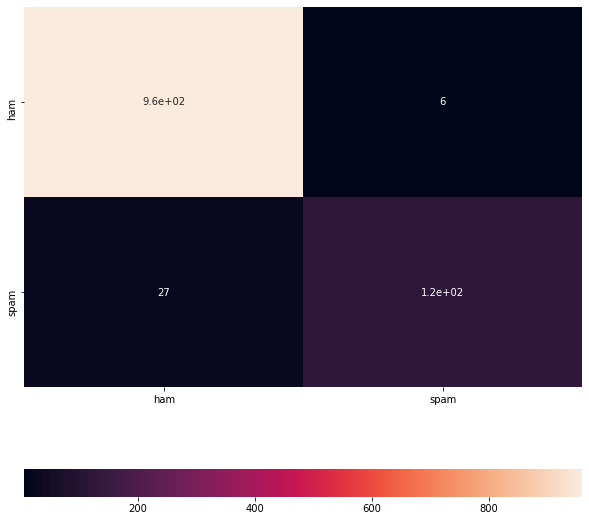

In [ ]:
fig = plt.figure(figsize = (10,10))
confusion_df = pd.DataFrame(c_m, columns = y_test.unique(), index = y_test.unique())
sns.heatmap(confusion_df, annot = True,cbar_kws={"orientation": "horizontal"} ) 

In [ ]:
c_m_lemm = confusion_matrix(pd.factorize(y_test)[0], log_grid_pip_lemm.predict(X_test_lemm))

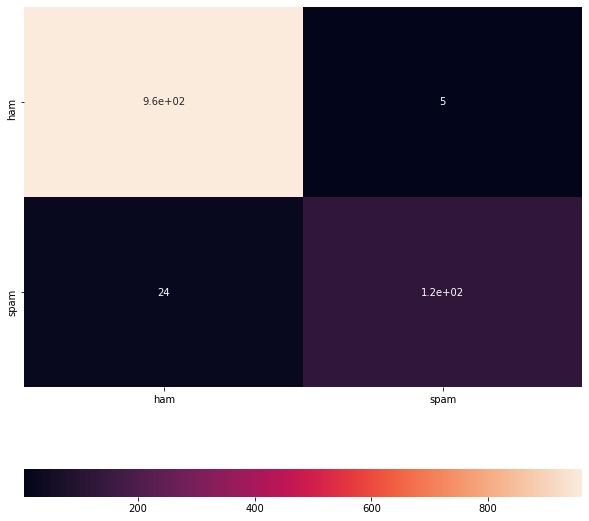

In [ ]:
fig = plt.figure(figsize = (10,10))
confusion_df = pd.DataFrame(c_m_lemm, columns = y_test.unique(), index = y_test.unique())
sns.heatmap(confusion_df, annot = True,cbar_kws={"orientation": "horizontal"} ) 